# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# Ejercicio con SKLearn

## Importar Librerias


In [2]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

print("Librerias Importadas \(°u°)/")

Librerias Importadas \(°u°)/


## Biblioteca Scikit-Learn

A continuacion se cargaran los datos de la biblioteca de datos "scikit-learn", la cual posee varias bases de datos disponibles para poder trabajar con ella. En este caso utilizaremos la database de "load_boston".

Load-Boston es una data base que refleja los datos correspondientes de la ciudad de Boston en USA, con la finalidad de ubicar una zona probable de residencia.

In [3]:
# Cargar los datos
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print("Load-Boston ha sido cargado")

Load-Boston ha sido cargado


In [4]:
# ¿Que contiene load-boston?
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


En el anterior codigo se imprimen las llaves principales que posee la base de datos load-boston, estas son:

1. datos/data: contiene la información de varias casas
2. feature_names: nombres de las características
3. DESCR: describe el conjunto de datos
4. objetivo/traget: los precios de la casa (caracterista más relevante)

Conociendo estas llaves, para nuestro objetivo, observaremos que caracteristicas tiene "feature_names".

In [5]:
# Muestrame feature_names de la database load_boston
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Las caracteristicas que encierra "feature_names" son las siguientes:

1. CRIM: Tasa de delincuencia per cápita por ciudad
2. ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
4. INDUS: Proporción de acres comerciales no minoristas por ciudad
5. CHAS: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
6. NOX: concentración de óxido nítrico (partes por 10 millones)
7. RM: Número medio de habitaciones por vivienda
8. EDAD: Proporción de unidades ocupadas por el propietario construidas antes de 1940
9. DIS: distancias ponderadas a cinco centros de empleo de Boston
10. RAD: Índice de accesibilidad a carreteras radiales
11. TAX/IMPUESTO: Tasa de impuesto a la propiedad de valor total por USD 10.000
12. PTRATIO: Proporción alumno/profesor por municipio
13. B: 1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
14. LSTAT: porcentaje de la población de menor estatus
15. MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 (REVISAR)

## Tabla de datos con Pandas

Para facilitar el uso de las caracteristicas de "feature_names", creamos una tabla utilizando "pandas".
Una tabla bidimencional utiliza filas y columnas, como filas (enumeracion de datos) utilizaremos la llave "data" y como columnas de los datos que queremos utilizaremos la llave "feature_names".

In [6]:
#creamos una tabla (tipo excel con PANDAS, con titulos para faciliar la manipulación)

#En una variable llamada "boston" creame un Dataframe de pandas, para enumerar "data" y para la info de las columnas "feature_names"
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#imprimimos las primeras 5 filas
boston.head(5)   

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


De la anterior tabla falta un ultimo dato:
 14. MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 (REVISAR).
 
Este dato lo debemos crear nosotros. Para esto insertamos una nueva fila a la que apodaremos MEDV.

In [7]:
#En nuestra reciente tabla "boston" crearemos una columna al final de esta apodada "MEDV",
# esta alvergara los datos de la llave "target" de la base de datos original.
boston['MEDV'] = boston_dataset.target
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Ahora si, podemos empezar a analizar los datos, podemos hacerlo de manera textual de la siguiente forma:

In [12]:
#Cuantos registros tiene el dataset (rows)
boston.shape[1]

14

In [13]:
boston.index

RangeIndex(start=0, stop=506, step=1)

In [14]:
#Cuántos datos tiene cada registro (columns)
boston.shape[1]

14

In [15]:
#Hay datos nulos (null) en el dataset?
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
boston.isnull().values.any()

False

En lo ultimo cabe hacer un apunte. Para trabajar con una base de datos, esta no debe tener datos nulos, sin embargo el eliminarlos no es siempre la mejor opcion, pues muchas veces un dato nulo se encuentra ubicado en medio de una fila cuyos vecinos posean data relevante para nuestro sistema, al eliminarla privaremos a nuestro programa de aprendizaje valioso.
Queda a consideracion del Ingeniero a cargo ver que se hacen con estos datos nulos, por ejemplo:
1. Si es una data pequeña borrar filas con datos nulos puede ser muy perjudicial.
2. Si es una data muy muy grande,borrar datos nulos puede ser irrelebante, esto es cuando dichos datos no superen el 1% del tamaño total de la database.
3. si se trata de valores calculados se puede ingresar datos que no manifiesten ruido al sistema y no alteren la tendencia que ya venian presentando, por ejemplo, poner datos en 0, en 1, en -1 o hallar la media de los que se esta presentando y reemplazar; de esta manera no se afectara el resultado de nuestro programa

## Graficando datos
Con los graficos basicos podemos revisar y estimar la densidad de kernel o la tendencia de los valores de cada caracteristica de "feature_names".

In [18]:
# Volvemos a imprimir la tabla 
boston['MEDV'] = boston_dataset.target
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


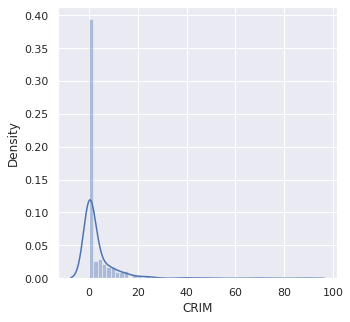

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


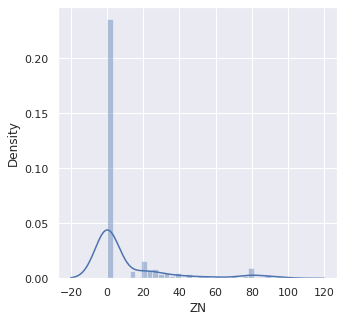

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


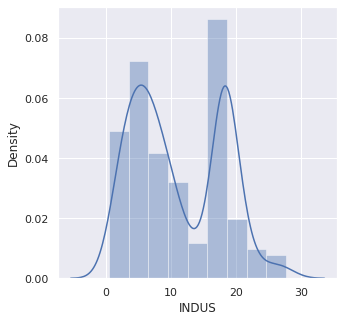

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


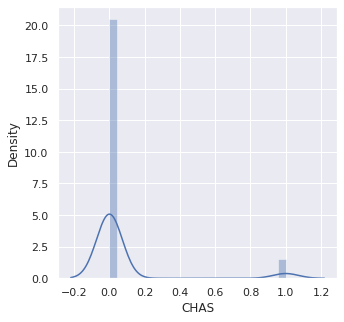

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


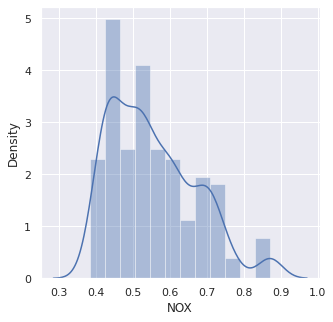

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


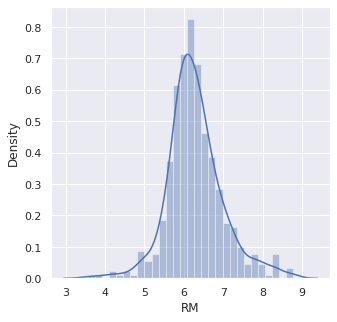

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


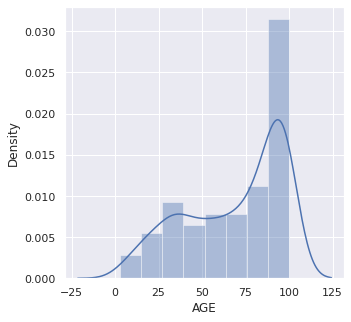

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


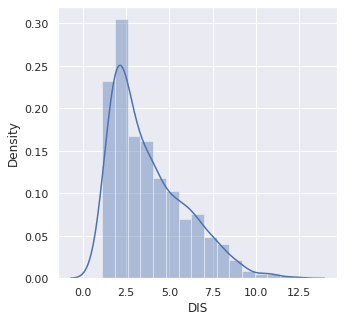

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


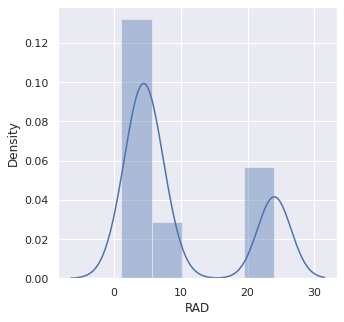

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


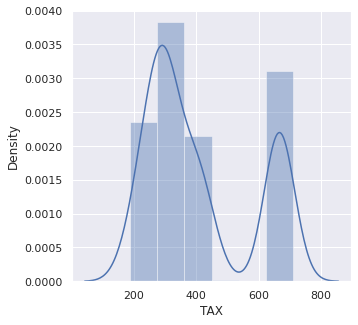

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


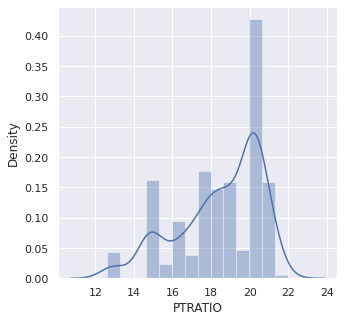

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


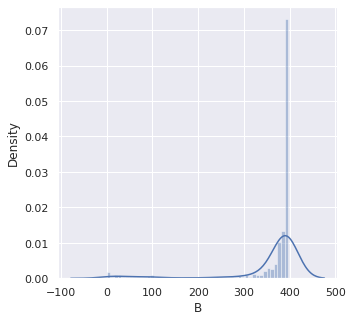

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


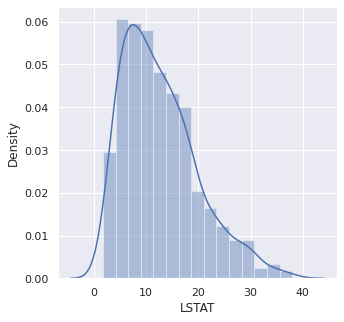

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


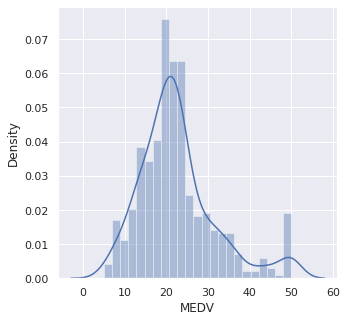

In [27]:
# 1. CRIM: Tasa de delincuencia per cápita por ciudad
sns.set(rc={'figure.figsize':(5.0,5.0)})  #tamaño del grafico
sns.distplot(boston['CRIM'])                #agregamos los datos
plt.show()                                  #visualizamos el grafico

# 2. ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['ZN'])                
plt.show()                                  

# 3. INDUS: Proporción de acres comerciales no minoristas por ciudad
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['INDUS'])                
plt.show()

# 4. CHAS: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['CHAS'])                
plt.show()

# 5. NOX: concentración de óxido nítrico (partes por 10 millones)
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['NOX'])                
plt.show()

# 6. RM: Número medio de habitaciones por vivienda
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['RM'])                
plt.show()

# 7. EDAD: Proporción de unidades ocupadas por el propietario construidas antes de 1940
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['AGE'])                
plt.show()

# 8. DIS: distancias ponderadas a cinco centros de empleo de Boston
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['DIS'])                
plt.show()

# 9. RAD: Índice de accesibilidad a carreteras radiales
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['RAD'])                
plt.show()

# 10. TAX/IMPUESTO: Tasa de impuesto a la propiedad de valor total por USD 10.000
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['TAX'])                
plt.show()

# 11. PTRATIO: Proporción alumno/profesor por municipio
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['PTRATIO'])                
plt.show()

# 12. B: 1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['B'])                
plt.show()

# 13. LSTAT: porcentaje de la población de menor estatus
sns.set(rc={'figure.figsize':(5.0,5.0)})  
sns.distplot(boston['LSTAT'])                
plt.show()

# 14. MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 (REVISAR)

sns.set(rc={'figure.figsize':(5.0,5.0)})  #tamaño del grafico
sns.distplot(boston['MEDV'])                #agregamos los datos
plt.show()                                  #visualizamos el grafico



## Matriz de Correlacion de datos

Este tipo de Grafico se utiliza para medir las relaciones entre las variables. De esta manera se logra determinar que valores son mas practicos para entregar un modelo de REGRESION LINEAL.

1. Un valor cercano a 1 = correlacion a la par (directamente proporcional)
2. Un valor cercano a -1 = correlacion inversa ( inversamente proporcional)

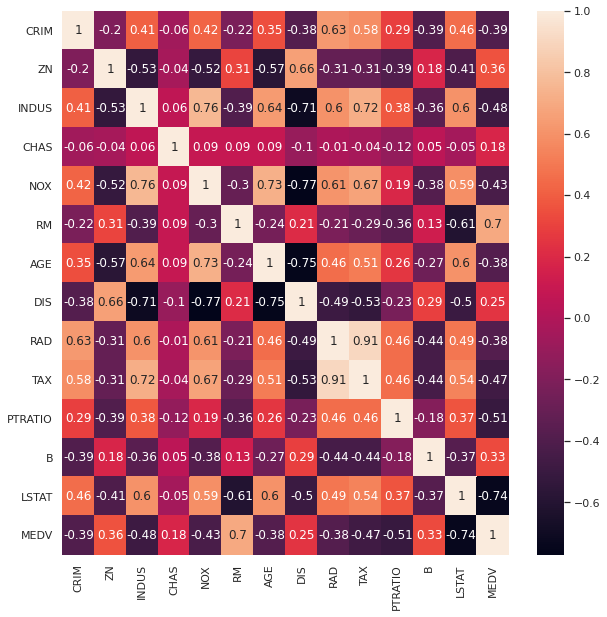

In [44]:
sns.set(rc={'figure.figsize':(10.0,10.0)}) #El tamaño de esta figura
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = boston.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

Se deben seleccionar aquellas características que tienen una alta correlación (ya se positiva o negativa) con nuestra variable de destino (MEDV).

Entre 0.7 a 0.74 sea positivo o negativo: MEDV <-> RM MEDV <-> LSTAT Se deben descartar las características que tengan multi-colinealidad (correlación utópica que solo se podría dar en laboratorio), son aquellas que tengan valores superiores 0,74: RAD<->TAX DIS<->AGE

Las correlaciones que pueden valer la pena son:

1. NOX vs INDUS
2. AGE vs NOX
3. DIS vs INDUS
4. DIS vs NOX
5. DIS vs AGE
6. TAX vs INDUS
7. TAX vs RAD *
8. MEDV vs RM
9. MEDV vs LSTAT

## Entrenamiento del modelo

Utilizando la lista de correlaciones que pueden llegar a ser:

1. NOX vs INDUS
2. AGE vs NOX
3. DIS vs INDUS
4. DIS vs NOX
5. DIS vs AGE
6. TAX vs INDUS
7. TAX vs RAD *
8. MEDV vs RM
9. MEDV vs LSTAT

Concatenaremos nuestra variable mas importante "MEDV" con cada una de las posibles correlaciones. Debemos recordar la formula de regresion lineal:

Y = mX + b

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el “punto de corte con el eje Y” en la gráfica (cuando X=0).

Concatenamos las columnas que seleccionamos para entrenar:
X = (valor de la lista)
 Y = MEDV


In [50]:
##Preparacion de los datos para el entrenamiento del modelo

#entrenando con dos variables en X
X = pd.DataFrame(np.c_[boston['NOX'], boston['INDUS']], columns = ['NOX','INDUS'])
Y = boston['MEDV']

In [51]:
# Dividir los datos en conjuntos de entrenamiento 80% y pruebas 20%
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 2), x20%: (102, 2)
y80%: (404,), y20%: (102,)


In [52]:
# Entrenando un modelo de regresion lineal

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

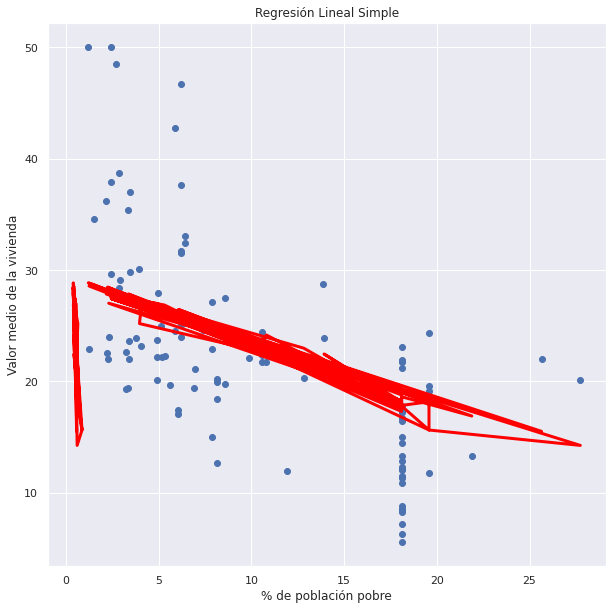


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.20635957368045632


In [54]:
# Evaluacion o examen para el modelo

# Se examina utilizando RMSE y R2-score.

# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['INDUS'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))